# Тестовое задание "Задача по анализу поиска в Яндекс Картинках"

## Задачи
1.	Укажите даты диапазона предоставленного вам для анализа?
2.	Рассчитайте кол-во запросов с текстом "ютуб" в каждой платформе (desktop, touch)
3.	Выведите топ10 самых частотных запросов в каждой платформе (desktop, touch). Какие отличия вы видите?
4.	Посмотрите, чем отличается трафик запросов в течение дня. Как можно объяснить отличие?
5.	Выделите тематики запросов, контрастные для мобильных и компьютеров - темы, доля которых отличаются на разных платформах

In [1]:
import pandas as pd

df = pd.read_csv('./data/data.tsv', sep='\t', names=["search_line", "time", "platform"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203824 entries, 0 to 1203823
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   search_line  1203824 non-null  object
 1   time         1203824 non-null  int64 
 2   platform     1203824 non-null  object
dtypes: int64(1), object(2)
memory usage: 27.6+ MB


In [2]:
df.head(10)

,search_line,time,platform
0,порно фото,1631786697,touch
1,малевич картины,1631806465,desktop
2,Секс,1631781583,touch
3,с днём рождения лена,1631771563,touch
4,зверополис порно,1631787599,touch
5,алабай собака фото,1631786645,touch
6,бактериофаг,1631816202,desktop
7,полина гагарина,1631804005,touch
8,кадр из фильма,1631770837,desktop
9,porno,1631780741,touch


## Задача 1

Укажите даты диапазона предоставленного вам для анализа?

Поскольку не указано time zone информация, будем считать даты по **UTC**.

In [3]:
df["date"] = pd.to_datetime(df['time'], unit='s')
df.head(10)

,search_line,time,platform,date
0,порно фото,1631786697,touch,2021-09-16 10:04:57
1,малевич картины,1631806465,desktop,2021-09-16 15:34:25
2,Секс,1631781583,touch,2021-09-16 08:39:43
3,с днём рождения лена,1631771563,touch,2021-09-16 05:52:43
4,зверополис порно,1631787599,touch,2021-09-16 10:19:59
5,алабай собака фото,1631786645,touch,2021-09-16 10:04:05
6,бактериофаг,1631816202,desktop,2021-09-16 18:16:42
7,полина гагарина,1631804005,touch,2021-09-16 14:53:25
8,кадр из фильма,1631770837,desktop,2021-09-16 05:40:37
9,porno,1631780741,touch,2021-09-16 08:25:41


In [4]:
date_range = df.loc[[df['time'].idxmin(), df['time'].idxmax()]]['date']
date_range.index = ['start', 'end']
print(f'Диапазон дат: {date_range['start'].strftime('%d.%m.%Y')} - {date_range['end'].strftime('%d.%m.%Y')}')

Диапазон дат: 31.08.2021 - 21.09.2021


## Задача 2

Рассчитайте кол-во запросов с текстом "ютуб" в каждой платформе (desktop, touch)

In [5]:
youtube_count_df = df[df['search_line'] == 'ютуб'].groupby(by=['platform']).size().to_frame().reset_index()
youtube_count_df.columns = ['platform', 'count']
youtube_count_df

,platform,count
0,desktop,714
1,touch,476


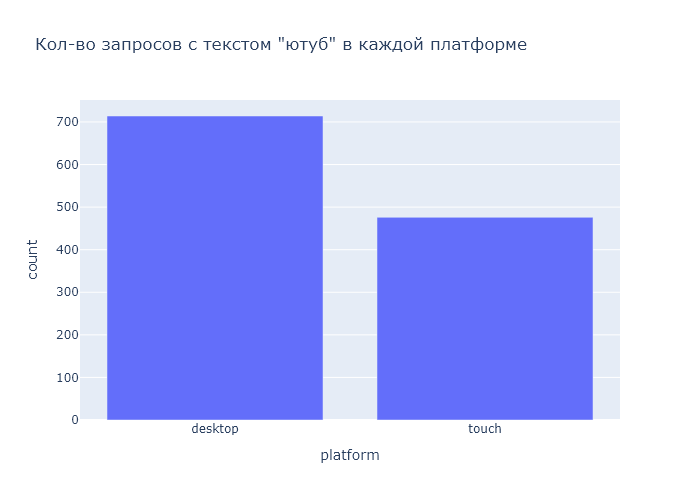

In [6]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly"
fig = px.bar(youtube_count_df, x='platform', y='count', title='Кол-во запросов с текстом "ютуб" в каждой платформе')
fig.show(renderer="png")

## Задача 3

Выведите топ10 самых частотных запросов в каждой платформе (desktop, touch). Какие отличия вы видите?

In [7]:
search_line_cnt_df = df.groupby(by=['search_line', 'platform']).size().to_frame().reset_index()
search_line_cnt_df.columns = ['search_line', 'platform', 'count']
search_line_cnt_df.head(10)

,search_line,platform,count
0,+18,desktop,11
1,+18,touch,34
2,+18 video,desktop,2
3,+18 video,touch,24
4,002,desktop,4
5,002,touch,15
6,02 аниме,desktop,34
7,02 аниме,touch,30
8,02 милый во франсе,desktop,7
9,02 милый во франсе,touch,23


In [8]:

search_line_cnt_df = search_line_cnt_df.groupby(by=['platform']).apply(lambda x: x.nlargest(10, 'count'), include_groups=False).reset_index()
search_line_cnt_df.head(10)

,platform,level_1,search_line,count
0,desktop,19078,календарь 2021,2804
1,desktop,42343,таблица менделеева,2631
2,desktop,19872,картинки,1647
3,desktop,32726,порно,1342
4,desktop,7645,английский алфавит,1293
5,desktop,28255,обои на рабочий стол,1143
6,desktop,5132,Одноклассники (социальная сеть),1116
7,desktop,38502,секс,895
8,desktop,42325,таблица квадратов,877
9,desktop,7292,алфавит,874


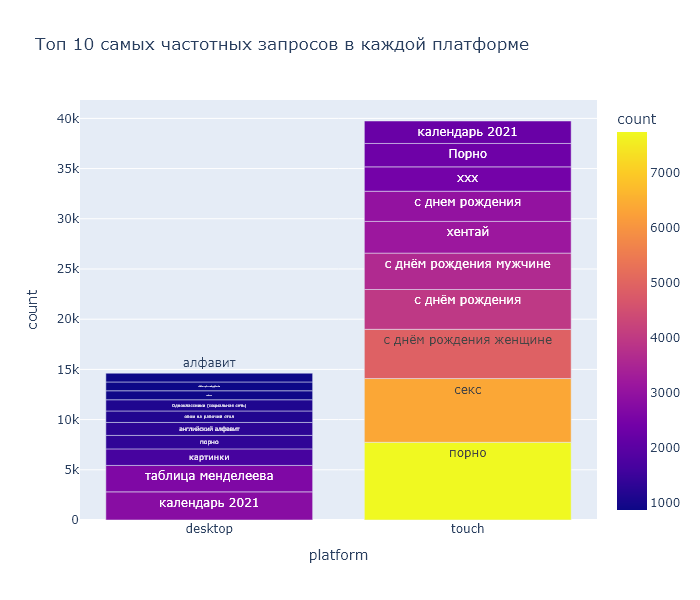

In [9]:
fig = px.bar(search_line_cnt_df, x='platform', y='count', title='Топ 10 самых частотных запросов в каждой платформе', text='search_line', color="count", height=600)
fig.show(renderer="png")

Исходя из диаграммы можно увидеть следующее:
- На мобильных устройства чаще всего ищут контент 18+, а также поздравления с днём рождения и календарь
- На компьютерах чаще всего ищут календарь, таблицу менделеева и картинки

Заметны существенные различия между платформами: на мобильных устройствах очень распространён поиск 18+ контента и поздравлений с днём рождения в отличие от ПК. На пк 18+ контент достаточно популярен, но не настолько.

## Задача 4

Посмотрите, чем отличается трафик запросов в течении дня. Как можно объяснить отличие?

In [10]:
df['msc_time'] = df['date'].dt.floor('30min').dt.time
df.head(10)

,search_line,time,platform,date,msc_time
0,порно фото,1631786697,touch,2021-09-16 10:04:57,10:00:00
1,малевич картины,1631806465,desktop,2021-09-16 15:34:25,15:30:00
2,Секс,1631781583,touch,2021-09-16 08:39:43,08:30:00
3,с днём рождения лена,1631771563,touch,2021-09-16 05:52:43,05:30:00
4,зверополис порно,1631787599,touch,2021-09-16 10:19:59,10:00:00
5,алабай собака фото,1631786645,touch,2021-09-16 10:04:05,10:00:00
6,бактериофаг,1631816202,desktop,2021-09-16 18:16:42,18:00:00
7,полина гагарина,1631804005,touch,2021-09-16 14:53:25,14:30:00
8,кадр из фильма,1631770837,desktop,2021-09-16 05:40:37,05:30:00
9,porno,1631780741,touch,2021-09-16 08:25:41,08:00:00


In [11]:
count_by_time = df.groupby(by=['msc_time']).size().to_frame().reset_index()
count_by_time.columns = ['msc_time', 'count']
count_by_time.head(10)

,msc_time,count
0,00:00:00,4873
1,00:30:00,5145
2,01:00:00,5848
3,01:30:00,6792
4,02:00:00,7990
5,02:30:00,9532
6,03:00:00,12476
7,03:30:00,15440
8,04:00:00,18889
9,04:30:00,21890


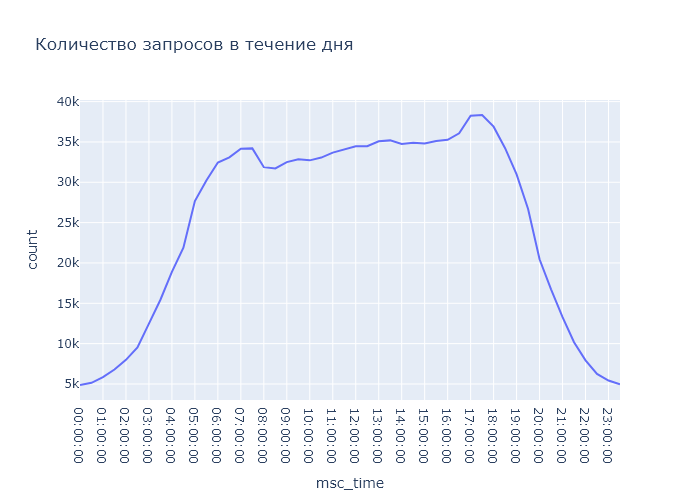

In [12]:
fig = px.line(count_by_time, x='msc_time', y='count', title='Количество запросов в течение дня')
fig.show(renderer="png")

По графику видно, что количество запросов зависит от времени суток.

Ночью запросов минимум. Это можно объяснить тем, что люди в это время спят.

Есть 2 пика запросов: в 7-8 часов утра и в 5-6 часов вечера. В это утреннее время люди собираются или едут на работу. А в данное вечернее время обычно заканчивается рабочий день. Поэтому люди более активные в эти времена.

Также можно заметить, что в течение рабочего дня количество запросов понемногу растёт. На это могут сказываться следующие причины:
- снижение концентрации работников на рабочих задачах, в следствии чего они всё больше проводят времени в интернете;
- конец занятий у школьников/студентов и последующее выполнение домашних заданий (обычно ближе к вечеру) с помощью поисковика.

## Задача 5

Выделите тематики запросов, контрастные для мобильных и компьютеров - темы, доля которых отличаются на разных платформах

In [13]:
grouped_search_line = df[:]
grouped_search_line['search_line'] = df['search_line'].str.lower().str.strip()
grouped_search_line = grouped_search_line.groupby(by=['search_line', 'platform']).size().to_frame().reset_index()
grouped_search_line.columns = ['search_line', 'platform', 'count']
grouped_search_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46593 entries, 0 to 46592
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   search_line  46593 non-null  object
 1   platform     46593 non-null  object
 2   count        46593 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [14]:
topics = [
    ['школа', ['таблиц', 'формул', 'падежи', 'дискриминант', 'теорем', 'синтаксический разбор предложения']],
    ['открытки', ['с днём рождения женщине', 'с днем рождения', 'с днём рождения мужчине', 'с днём рождения']],
    ['айфон', ['айфон', 'iphone']],
    ['18+', ['секс', 'хентай', 'сиськи', 'porn', 'порн', 'голые', 'голый', 'пизда', 'sex', 'boob']],
    ['люди', ['девушка', 'девушки', 'белла торн', 'тимур бекмансуров', 'жан-поль бельмондо', 'моргенштерн', 'женщины', 'инстасамка', 'путин', 'женщина']],
    ['информация', ['календарь', 'алфавит', 'карта', 'текст', 'флаг', 'расписание', 'герб', 'цифры', 'схема', '1 сентября']],
    ['сайты', ['одноклассники (социальная сеть)', 'youtube', 'ютуб', 'вк', 'minecraft', 'переводчик', 'яндекс', 'портал государственных услуг российской федерации', 'whatsapp', 'майнкрафт']],
    ['обои', ['обои ', 'осень', 'обои', 'космос']],
    ['аниме', ['аниме', 'наруто', 'токийские мстители', '13 карт']],
    ['без категории', ['картинки', 'фото', 'раскраски', 'рисунки', 'спасибо за внимание', 'фон', 'раскраска', 'мемы']],
]

grouped_search_line['topic_name'] = 'другое'
for topic_name, values in topics:
    for val in values:
        grouped_search_line.loc[grouped_search_line['search_line'].str.contains(val), 'topic_name'] = topic_name

grouped_topics = grouped_search_line.groupby(by=['topic_name', 'platform']).apply(lambda x: x['count'].sum(), include_groups=False).reset_index()
grouped_topics.columns = ['topic_name', 'platform', 'count']

grouped_topics.head(10)

C:\Users\danil\AppData\Local\Temp\ipykernel_19288\782991340.py:17: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,topic_name,platform,count
0,18+,desktop,9676
1,18+,touch,59545
2,айфон,desktop,686
3,айфон,touch,1652
4,аниме,desktop,5955
5,аниме,touch,10185
6,без категории,desktop,36723
7,без категории,touch,64932
8,другое,desktop,285378
9,другое,touch,518293


In [15]:
platform_counts = grouped_topics.groupby(by=['platform']).apply(lambda x: x['count'].sum(), include_groups=False).to_frame().transpose()
platform_counts

platform,desktop,touch
0,411566,792258


In [16]:
grouped_topics['distribution'] = grouped_topics.apply(lambda x: x['count'] / platform_counts[x['platform']][0], axis=1)
grouped_topics = grouped_topics[grouped_topics['topic_name'] != 'другое']
grouped_topics.head(10)

,topic_name,platform,count,distribution
0,18+,desktop,9676,0.023510
1,18+,touch,59545,0.075159
2,айфон,desktop,686,0.001667
3,айфон,touch,1652,0.002085
4,аниме,desktop,5955,0.014469
5,аниме,touch,10185,0.012856
6,без категории,desktop,36723,0.089227
7,без категории,touch,64932,0.081958
10,информация,desktop,31253,0.075937
11,информация,touch,42290,0.053379


In [17]:
difference_df = grouped_topics.pivot_table(index='topic_name', columns='platform', values='distribution').reset_index()

difference_df['difference'] = difference_df['desktop'] - difference_df['touch']
difference_df.head(10)

platform,topic_name,desktop,touch,difference
0,18+,0.023510,0.075159,-0.051648
1,айфон,0.001667,0.002085,-0.000418
2,аниме,0.014469,0.012856,0.001613
3,без категории,0.089227,0.081958,0.007269
4,информация,0.075937,0.053379,0.022558
5,люди,0.018218,0.020900,-0.002682
6,обои,0.017859,0.008515,0.009344
7,открытки,0.012683,0.064734,-0.052051
8,сайты,0.018629,0.010979,0.007650
9,школа,0.034405,0.015239,0.019166


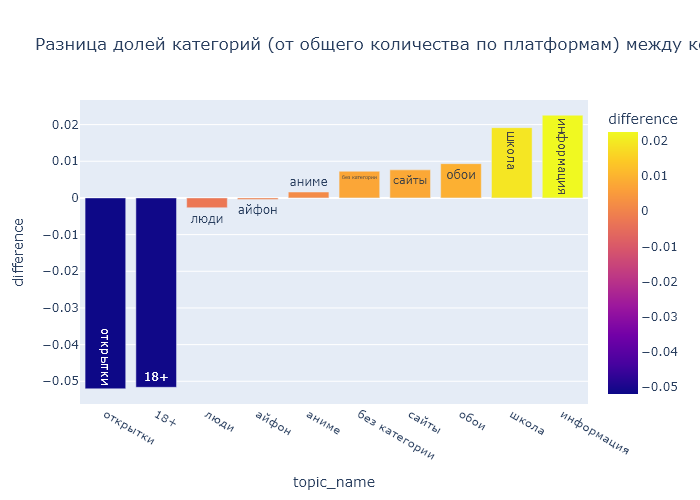

In [18]:
fig = px.bar(difference_df.sort_values(by=['difference']), x='topic_name', y='difference', title='Разница долей категорий (от общего количества по платформам) между компьютерами и мобильными', text='topic_name', color="difference")
fig.show(renderer="png")

По графику видно, что контрастными тематиками для мобильных и компьютеров являются "открытки", "18+ контент", "школа" и "информация".

То есть на мобильных устройствах люди намного чаще ищут 18+ контент и различные открытки. На компьютерах чаще ищут информацию по типу календаря или карт, а также школьную информацию по типу всяких формул и таблиц.